<a href="https://colab.research.google.com/github/shivansh11235/Assignment-3_DS/blob/main/102217139_Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

          Model  TOPSIS Score  Ranking
4            T5      0.763540        1
2   GPT-2 Large      1.000000        2
0         GPT-2      0.000000        3
3       GPT-NEO      0.268279        4
1  GPT-2 Medium      0.528339        5


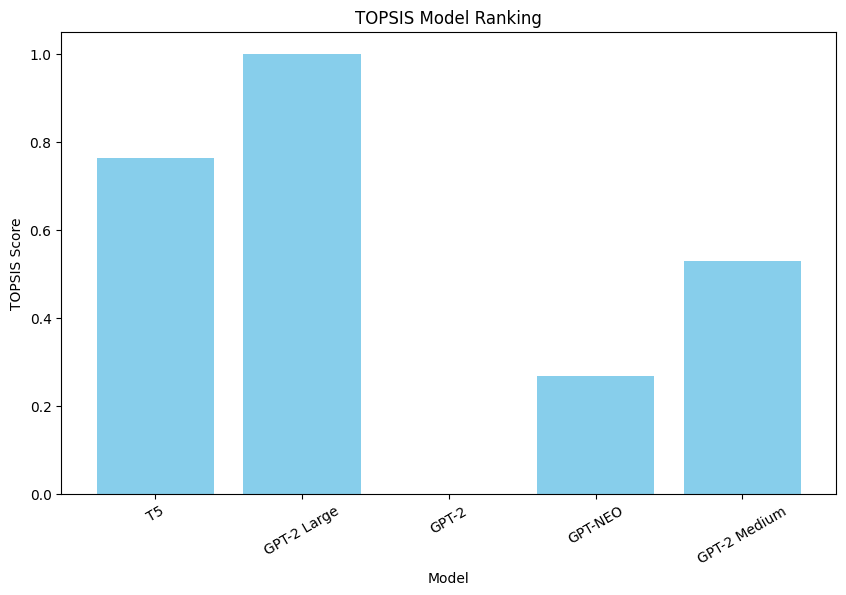

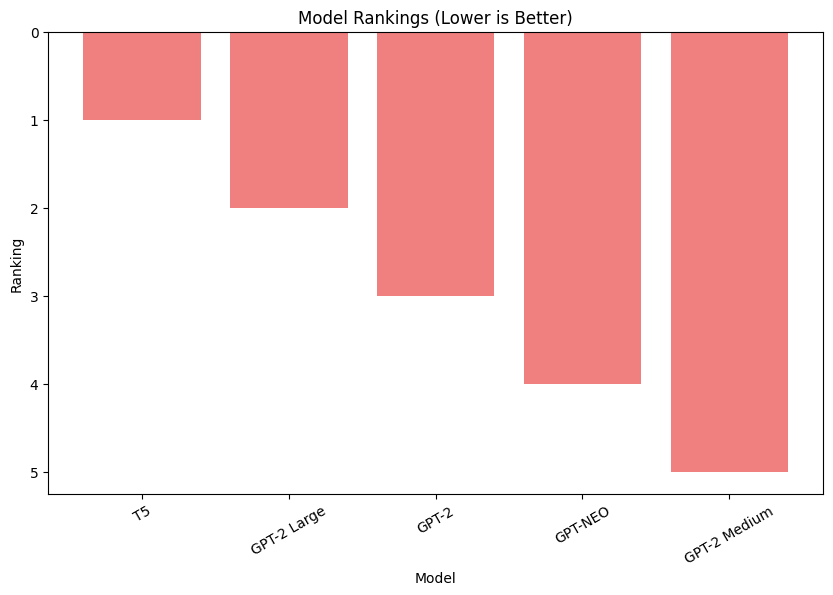

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Function to normalize the decision matrix using Min-Max scaling
def normalize_using_minmax(matrix, criteria):
    scaler = MinMaxScaler()
    normalized = scaler.fit_transform(matrix)
    normalized[:, criteria == 0] = 1 - normalized[:, criteria == 0]  # Invert cost criteria
    return normalized

# Function implementing the TOPSIS method for ranking models
def topsis_method(matrix, weights, criteria):
    norm_matrix = normalize_using_minmax(matrix, criteria)  # Normalize the matrix
    weighted_matrix = norm_matrix * weights  # Apply weights

    # Determine ideal best and worst solutions
    ideal_best = np.max(weighted_matrix, axis=0) * criteria + np.min(weighted_matrix, axis=0) * (1 - criteria)
    ideal_worst = np.min(weighted_matrix, axis=0) * criteria + np.max(weighted_matrix, axis=0) * (1 - criteria)

    # Calculate distances from ideal best and worst solutions
    dist_best = np.sqrt(np.sum((weighted_matrix - ideal_best) ** 2, axis=1))
    dist_worst = np.sqrt(np.sum((weighted_matrix - ideal_worst) ** 2, axis=1))

    # Compute TOPSIS scores
    scores = dist_worst / (dist_best + dist_worst)
    rankings = scores.argsort()[::-1] + 1  # Higher score means better rank

    return scores, rankings

# List of model names under evaluation
model_names = ['GPT-2', 'GPT-2 Medium', 'GPT-2 Large', 'GPT-NEO', 'T5']

# Performance data for each model (accuracy, latency, memory, efficiency)
performance_data = np.array([
    [0.88, 300, 1300, 0.82],  # GPT-2
    [0.90, 400, 1600, 0.85],  # GPT-2 Medium
    [0.92, 500, 1800, 0.87],  # GPT-2 Large
    [0.89, 350, 1400, 0.84],  # GPT-NEO
    [0.91, 450, 1700, 0.86]   # T5
])

# Define which criteria are benefits (1) and which are costs (0)
criteria_flags = np.array([1, 0, 0, 1])  # Accuracy and efficiency are benefits, latency and memory are costs

# Assign weightage to each feature
feature_weights = np.array([0.4, 0.2, 0.2, 0.2])

# Apply the TOPSIS method
final_scores, final_rankings = topsis_method(performance_data, feature_weights, criteria_flags)

# Compile results into a DataFrame for better readability
final_results = pd.DataFrame({
    "Model": model_names,
    "TOPSIS Score": final_scores,
    "Ranking": final_rankings
}).sort_values(by="Ranking")

# Display final ranking results
print(final_results)

# Visualization - Bar Chart for TOPSIS Scores
plt.figure(figsize=(10, 6))
plt.bar(final_results["Model"], final_results["TOPSIS Score"], color='skyblue')
plt.xlabel("Model")
plt.ylabel("TOPSIS Score")
plt.title("TOPSIS Model Ranking")
plt.xticks(rotation=30)
plt.show()

# Visualization - Bar Chart for Rankings
plt.figure(figsize=(10, 6))
plt.bar(final_results["Model"], final_results["Ranking"], color='lightcoral')
plt.xlabel("Model")
plt.ylabel("Ranking")
plt.title("Model Rankings (Lower is Better)")
plt.xticks(rotation=30)
plt.gca().invert_yaxis()  # Invert y-axis to show best-ranked model at the top
plt.show()